


#**MY NOTEBOOK**

Notebook ini dibuat untuk melancarkan tugas proyek yang diselenggarakan oleh lembaga edukasi Bangkit.


##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

Memanggil package yang akan digunakan

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.5.0


## Unduh dataset
Upload dulu file kaggle.json sebelum melanjutkan ke code setelah ini

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


Mengunduh dataset dari [kaggle.com](https://www.kaggle.com/moltean/fruits)

In [ ]:
! kaggle datasets download moltean/fruits

 99% 749M/760M [00:03<00:00, 232MB/s]
100% 760M/760M [00:03<00:00, 205MB/s]


Mengekstrak file zip

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('fruits_z.zip', 'r')
zip_ref.extractall()
zip_ref.close()

##Preproses file

In [ ]:
! rm -R -f fruits_

In [ ]:
with open('label_inti.txt','r') as f:
  words = f.readlines()
words = [word.strip() for word in words]

new_label = sorted(set(words))
os.mkdir('fruits_')
os.mkdir('fruits_/Training')
os.mkdir('fruits_/Test')
for folder in new_label:
  path1 = os.path.join('fruits_/Training', folder)
  path2 = os.path.join('fruits_/Test', folder)
  os.mkdir(path1)
  os.mkdir(path2)

In [ ]:
# with open('label_inti.txt', 'r') as f: # use 'label_inti.txt' for fruit label without variety, or 'label_inti.txt' with variety
#   labels = {}
#   iterator = 0
#   words = f.readlines()
#   for label in words:
#     labels[iterator] = label.strip()
#     iterator += 1
# print(labels)

labels_folder = os.listdir('fruits_/Training/')
labels = {}
iterator = 0
for label in sorted(labels_folder):
  labels[iterator] = label
  iterator += 1
print(labels)

{0: 'Apple', 1: 'Apricot', 2: 'Avocado', 3: 'Banana', 4: 'Beetroot', 5: 'Blueberry', 6: 'Cactus fruit', 7: 'Cantaloupe', 8: 'Carambula', 9: 'Cauliflower', 10: 'Cherry', 11: 'Chestnut', 12: 'Clementine', 13: 'Cocos', 14: 'Corn', 15: 'Cucumber', 16: 'Dates', 17: 'Eggplant', 18: 'Fig', 19: 'Ginger Root', 20: 'Granadilla', 21: 'Grape', 22: 'Grapefruit', 23: 'Guava', 24: 'Hazelnut', 25: 'Huckleberry', 26: 'Kaki', 27: 'Kiwi', 28: 'Kohlrabi', 29: 'Kumquats', 30: 'Lemon', 31: 'Limes', 32: 'Lychee', 33: 'Mandarine', 34: 'Mango', 35: 'Mangostan', 36: 'Maracuja', 37: 'Melon Piel de Sapo', 38: 'Mulberry', 39: 'Nectarine', 40: 'Nut', 41: 'Onion', 42: 'Orange', 43: 'Papaya', 44: 'Passion Fruit', 45: 'Peach', 46: 'Pear', 47: 'Pepino', 48: 'Pepper', 49: 'Physalis', 50: 'Pineapple', 51: 'Pitahaya Red', 52: 'Plum', 53: 'Pomegranate', 54: 'Pomelo Sweetie', 55: 'Potato', 56: 'Quince', 57: 'Rambutan', 58: 'Raspberry', 59: 'Redcurrant', 60: 'Salak', 61: 'Strawberry', 62: 'Tamarillo', 63: 'Tangelo', 64: 'Tom

In [ ]:
old_name = list(labels.values())
map_dict = {}
for new_l, old_l in zip(words, old_name):
  map_dict[old_l] = ''
  map_dict[old_l] = new_l

In [ ]:
for old_l, new_l in map_dict.items():
  for img_file in os.listdir(os.path.join('fruits-360/Training', old_l)):
    src_file = '\"' + os.path.join(os.path.join('fruits-360/Training', old_l), img_file) + '\"'
    des_file = '\"' + os.path.join('fruits_/Training', new_l) + '\"'
    !cp {src_file} {des_file}

In [ ]:
for old_l, new_l in map_dict.items():
  for img_file in os.listdir(os.path.join('fruits-360/Test', old_l)):
    src_file = '\"' + os.path.join(os.path.join('fruits-360/Test', old_l), img_file) + '\"'
    des_file = '\"' + os.path.join('fruits_/Test', new_l) + '\"'
    !cp {src_file} {des_file}

In [ ]:
len(os.listdir('fruits_/Training'))

65

## Menentukan arsitektur model

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(65, activation='softmax')
 
    # source architecture
    # tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3),padding='same'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(131, activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(learning_rate=0.001), # 'Adamax', # 
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

Membuat imagegenerator yang mengambil gambar dari folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'fruits_/Training/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300, don't forget that the resource use 100x100
        batch_size=512,
        class_mode='categorical')
 
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'fruits_/Test/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300, don't forget that the resource use 100x100
        batch_size=512,
        class_mode='categorical')

Found 38574 images belonging to 65 classes.
Found 16880 images belonging to 65 classes.


##Training dan menyimpan model

In [ ]:
from keras.callbacks import ModelCheckpoint
 
learned_weights = ModelCheckpoint(filepath = 'proyek_weightv2.hdf5', verbose = 1, save_best_only = True)
 
history = model.fit(
      train_generator,
      steps_per_epoch=75, # 133,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=32, #45,
      shuffle=True, callbacks = [learned_weights] # Save new weight
      )
 
model.load_weights('proyek_weightv2.hdf5')
model.save("saved_model/proyekv3")
# model.save("proyekv2.h5")
# model_json = model.to_json()
# with open("model_jsonv2.json", "w") as json_file:
#     json_file.write(model_json)

Epoch 1/30
75/75 [==============================] - 109s 1s/step - loss: 0.9969 - accuracy: 0.7171 - val_loss: 1.6286 - val_accuracy: 0.5912

Epoch 00001: val_loss improved from inf to 1.62856, saving model to proyek_weightv2.hdf5
Epoch 2/30
75/75 [==============================] - 121s 2s/step - loss: 0.4578 - accuracy: 0.8741 - val_loss: 0.8129 - val_accuracy: 0.8218

Epoch 00002: val_loss improved from 1.62856 to 0.81288, saving model to proyek_weightv2.hdf5
Epoch 3/30
75/75 [==============================] - 106s 1s/step - loss: 0.3140 - accuracy: 0.9285 - val_loss: 0.6617 - val_accuracy: 0.8548

Epoch 00003: val_loss improved from 0.81288 to 0.66174, saving model to proyek_weightv2.hdf5
Epoch 4/30
75/75 [==============================] - 125s 2s/step - loss: 0.2134 - accuracy: 0.9498 - val_loss: 0.5735 - val_accuracy: 0.8796

Epoch 00004: val_loss improved from 0.66174 to 0.57347, saving model to proyek_weightv2.hdf5
Epoch 5/30
75/75 [==============================] - 114s 2s/step

Menampilkan grafik akurasi dan loss

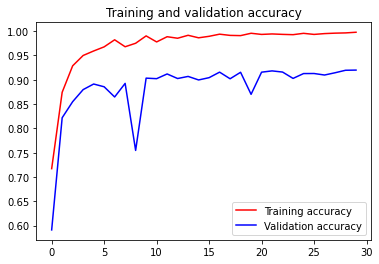

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
 
 
plt.show()

Jika pakai model yang sudah ada

In [ ]:
from keras.models import load_model

model = load_model('proyekv1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
model.save("saved_model/proyekv3")

INFO:tensorflow:Assets written to: saved_model/proyekv3/assets


## Testing model

Membuat dictionary label

In [ ]:
test_path = 'fruits-360/Test/Chestnut/' # 'fruits-360/test-multiple_fruits/' # 
test_images_name = os.listdir(test_path)
test_images = {test_path + name:0 for name in test_images_name}

Memprediksi gambar dari folder/upload

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from sklearn.metrics import accuracy_score
 
uploaded = test_images #files.upload() 

predict_list = []
for fn in sorted(uploaded.keys()):
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300)) # don't forget to change the size 100x100 for v2 or 300x300 for v2
  x = image.img_to_array(img)
  x /= 255 #update.. rescale image before predicting
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  pred = labels[np.argmax(classes[0])]
  print('\u2022 ', fn,' terprediksi sebagai ', pred)
  predict_list.append(np.argmax(classes[0]))
  # print(classes)

# predict_ = np.array(predict_list)
# target_ = 32*np.ones(len(uploaded.keys()))
# print(predict_, len(predict_))
# print(target_, len(target_))
# print('\nAccuracy: ', accuracy_score(target_, predict_))

•  fruits-360/Test/Chestnut/101_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/102_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/103_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/104_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/105_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/106_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/107_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/108_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/109_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/112_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/113_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/114_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/115_100.jpg  terprediksi sebagai  Chestnut
•  fruits-360/Test/Chestnut/116_100.jpg  terprediksi sebagai  Chestnut
•  fru

In [ ]:
os.mkdir('saved_model')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np
#path of the directory where you want to save your model
frozen_out_path = 'saved_model'
# name of the .pb file
frozen_graph_filename = "frozen_graph"
model = model # Your model
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))
# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)
# Save frozen graph to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
# Save its text representation
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

------------------------------------------------------------
Frozen model layers: 
x
sequential/keras_layer/29097
Func/sequential/keras_layer/StatefulPartitionedCall/input/_244
sequential/keras_layer/29099
Func/sequential/keras_layer/StatefulPartitionedCall/input/_245
sequential/keras_layer/28663
Func/sequential/keras_layer/StatefulPartitionedCall/input/_27
sequential/keras_layer/28673
Func/sequential/keras_layer/StatefulPartitionedCall/input/_32
sequential/keras_layer/28617
Func/sequential/keras_layer/StatefulPartitionedCall/input/_4
sequential/keras_layer/28701
Func/sequential/keras_layer/StatefulPartitionedCall/input/_46
sequential/keras_layer/28703
Func/sequential/keras_layer/StatefulPartitionedCall/input/_47
sequential/keras_layer/29105
Func/sequential/keras_layer/StatefulPartitionedCall/input/_248
sequential/keras_layer/29129
Func/sequential/keras_layer/StatefulPartitionedCall/input/_260
sequential/keras_layer/28665
Func/sequential/keras_layer/StatefulPartitionedCall/input/_28
se

'saved_model/frozen_graph.pbtxt'

[(21, 173, 111, 114), (373, 0, 82, 194), (194, 165, 119, 120), (348, 205, 120, 110), (200, 25, 134, 90), (355, 358, 113, 107), (194, 348, 115, 113), (194, 349, 115, 111), (12, 28, 150, 81), (196, 163, 118, 125), (22, 348, 134, 108)]


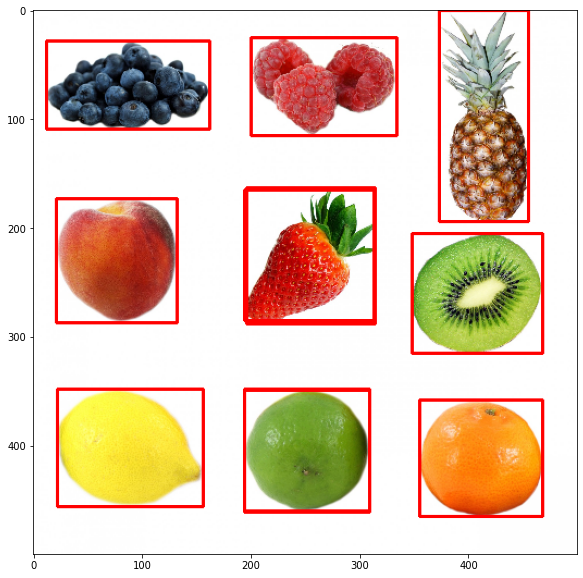

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('fruit-selection-white-background.jpg')
img = cv2.resize(img, (500, 500))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, bw_img = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

img_canny = cv2.Canny(bw_img, 140, 140 * 2)
img_canny = cv2.morphologyEx(img_canny, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))

contours, _ = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
bounding_boxes = []
contours_poly = []
for contour in contours:
    polygon = cv2.approxPolyDP(contour, 3, True)
    contours_poly.append(polygon)
    bounding_boxes.append(cv2.boundingRect(polygon))

bb = []
image_copy = np.copy(img)
for box in bounding_boxes:
    if (box[2] * box[3]) >= 300:
        cv2.rectangle(image_copy, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), [0, 0, 255], 2)
        # cv2.circle(image_copy, (box[0] + int(box[2] / 2), box[1] + int(box[3] / 2)), 1, (0, 255, 0), 4)
        bb.append(box)
bb = list(set(bb))
print(bb)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

In [ ]:
# How to load a Tensorflow model using OpenCV
# Jean Vitor de Paulo Blog - https://jeanvitor.com/tensorflow-object-detecion-opencv/

import cv2
import matplotlib.pyplot as plt

# Load a model imported from Tensorflow
tensorflowNet = cv2.dnn.readNetFromTensorflow('saved_model/frozen_graph.pb')
box = bb[4]
img = image_copy[ box[1]:box[1] + box[3], box[0]:box[0] + box[2]]  #cv2.imread('fruits-360/Test/Avocado/45_100.jpg')
rows, cols, channels = img.shape
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use the given image as input, which needs to be blob(s).
tensorflowNet.setInput(cv2.dnn.blobFromImage(img, 1 / 255.0, size=(224, 224), swapRB=True, crop=False))
# Runs a forward pass to compute the net output
networkOutput = tensorflowNet.forward()

print(labels[np.argmax(networkOutput[0])])
plt.imshow(img2)

error: ignored

#Menggunakan Transfer Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! gdown https://drive.google.com/uc?id=1Izf7xRGKQSmJLWnw_ItFR0DplTCiSx5X

Downloading...
From: https://drive.google.com/uc?id=1Izf7xRGKQSmJLWnw_ItFR0DplTCiSx5X
To: /content/fruits_z.zip
417MB [00:06, 63.6MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('fruits_z.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
print(os.listdir('drive/MyDrive/fruits_'))
train_path = 'fruits_/Training'
test_path = 'fruits_/Test'


['Training', 'Test']


In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
model_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}

handle_base, pixels, FV_SIZE = model_selection

IMAGE_SIZE = (pixels, pixels)

MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,))

print("Using {} with input size {} and output dimension {}.".format(handle_base, IMAGE_SIZE, FV_SIZE))

Using mobilenet_v2 with input size (224, 224) and output dimension 1280.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=IMAGE_SIZE,
        batch_size=512,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        test_path,
        target_size=IMAGE_SIZE,
        batch_size=512,
        class_mode='categorical')

Found 67692 images belonging to 67 classes.
Found 22688 images belonging to 67 classes.


In [ ]:
print("Building model with: ", MODULE_HANDLE, '\n')

layer1 = [feature_extractor, 
          tf.keras.layers.Dense(512, activation='relu')]
layer2 = [tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=IMAGE_SIZE + (3,)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.DepthwiseConv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
          tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
          tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu')]

model = tf.keras.Sequential(
        layer1 +
        [
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(67, activation='softmax')
])

model.summary()

Building model with:  https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 67)                17219     
Total params: 3,062,403
Trainable params: 804,419
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
do_fine_tuning = False #@param {type:"boolean"}

if do_fine_tuning:
    feature_extractor.trainable = True    
else:
    feature_extractor.trainable = False

In [ ]:
if do_fine_tuning:
    optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = 'adam'
    
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
 
learned_weights = ModelCheckpoint(filepath = 'proyek_weightv3.hdf5', verbose = 1, save_best_only = True)
 
history = model.fit(
      train_generator,
      steps_per_epoch=132,
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=44,
      shuffle=True, callbacks = [learned_weights] # Save new weight
      )
 
# model.load_weights('proyek_weightv3.hdf5')
# model.save("saved_model/proyekv3_tlmobilenet")

Epoch 1/30
132/132 [==============================] - 119s 897ms/step - loss: 0.0176 - accuracy: 0.9962 - val_loss: 0.0973 - val_accuracy: 0.9780

Epoch 00001: val_loss improved from inf to 0.09731, saving model to proyek_weightv3.hdf5
Epoch 2/30
132/132 [==============================] - 120s 905ms/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.0854 - val_accuracy: 0.9794

Epoch 00002: val_loss improved from 0.09731 to 0.08540, saving model to proyek_weightv3.hdf5
Epoch 3/30
132/132 [==============================] - 121s 917ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.0828 - val_accuracy: 0.9838

Epoch 00003: val_loss improved from 0.08540 to 0.08275, saving model to proyek_weightv3.hdf5
Epoch 4/30
132/132 [==============================] - 120s 905ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0864 - val_accuracy: 0.9802

Epoch 00004: val_loss did not improve from 0.08275
Epoch 5/30
132/132 [==============================] - 120s 906ms/step - loss: 0.0068 -

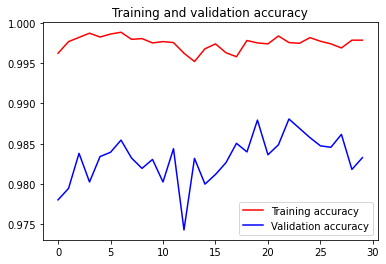

<Figure size 432x288 with 0 Axes>

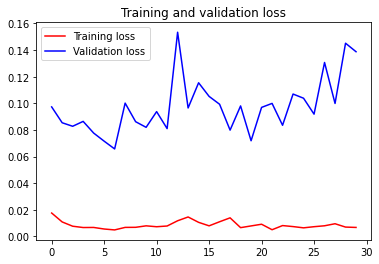

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
 
plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
 
plt.show()

In [ ]:
import os
os.mkdir('saved_model1')
!cp proyek_weightv3.hdf5 saved_model1/proyek_weightv3.hdf5
model.load_weights('proyek_weightv3.hdf5')
model.save("saved_model1/proyekv3_mblnet.h5")
model.save("saved_model1/proyekv3_tlmobilenet")
!cp -r saved_model1 drive/MyDrive

INFO:tensorflow:Assets written to: saved_model1/proyekv3_tlmobilenet/assets


INFO:tensorflow:Assets written to: saved_model1/proyekv3_tlmobilenet/assets


## Memanggil dan menguji model

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/saved_model1/proyekv3_tlmobilenet')

In [ ]:
labels_folder = os.listdir('fruits_/Training/')
labels = {}
iterator = 0
for label in sorted(labels_folder):
  labels[iterator] = label
  iterator += 1
print(labels)

In [ ]:
test_path = 'fruits_/Test/Chestnut/' # 'fruits-360/test-multiple_fruits/' # 
test_images_name = os.listdir(test_path)
test_images = {test_path + name:0 for name in test_images_name}

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from sklearn.metrics import accuracy_score
 
uploaded = test_images #files.upload() 

predict_list = []
for fn in sorted(uploaded.keys()):
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x /= 255 #update.. rescale image before predicting
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  pred = labels[np.argmax(classes[0])]
  print('\u2022 ', fn,' terprediksi sebagai ', pred)
  predict_list.append(np.argmax(classes[0]))
  # print(classes)

# predict_ = np.array(predict_list)
# target_ = 32*np.ones(len(uploaded.keys()))
# print(predict_, len(predict_))
# print(target_, len(target_))
# print('\nAccuracy: ', accuracy_score(target_, predict_))

•  fruits_/Test/Chestnut/101_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/102_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/103_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/104_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/105_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/106_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/107_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/108_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/109_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/112_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/113_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/114_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/115_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/116_100.jpg  terprediksi sebagai  Chestnut
•  fruits_/Test/Chestnut/117_100.jpg  terprediks